This analysis is brought to you by Alex Romanov, inspired by Google and Coursera as a part of Google Data Analytics Certification and Divvy bike-sharing company as a source of data. Throughout this project, you will see some real-world data kindly provided by Motivate International Inc. for public use under this [license](https://www.divvybikes.com/data-license-agreement).

In Data Analytics Certification the dataset is referred to a fictional bike-sharing company called Cyclistic, so let's keep that name - you will see it on different stages of data analysis. You can come along with me through all the steps of data cleaning and processing, but if you are interested just in conclusions the data let me make, you can find it at the [end of the report](https://www.kaggle.com/itsokalex/cyclistic-divvy-bike-sharing-data-analytic/#conclusions).

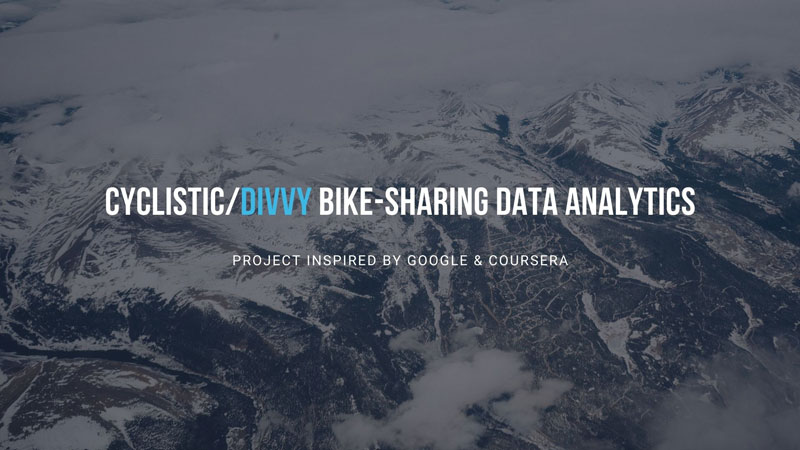

<H2 id="Goal">Goal</H2>Analyze the Cyclistic historical bike trip data to identify trends in how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. It is needed for the marketing analyst team to design marketing strategies aimed at converting casual riders into annual members.

I assume unless your job is related to data, you're more interested in a story itself, rather than how people use coding to get to conclusions, but I include all the steps here, so anyone can reproduce. This is the part of Kaggle that I appreciate - people share and I can learn a lot about data processing and see useful chunks of code that I could use as well.

So the first thing we need is to download a dataset - a list of .csv datasheets that we open and check. I have finished working with the year 2020 on my local machine, so at this stage we will analyze 2021. I've got it from [the same source](https://divvy-tripdata.s3.amazonaws.com/index.html). What we see is the names of columns, we see there are members and casual riders.

As it was stated in the assignment: annual members are counted as "members" and people who get daily passes or ride from time to time are denoted as "casual". It'll be really hard to come to any conclusions if we have inconsistent information about membership, especially when we aim to turn casual riders into customers, so let's find more about them on the company website. Googling, we can quickly find divvybikes.com, and checking the website we find pricing plans for a single ride, daily pass, and annual membership.

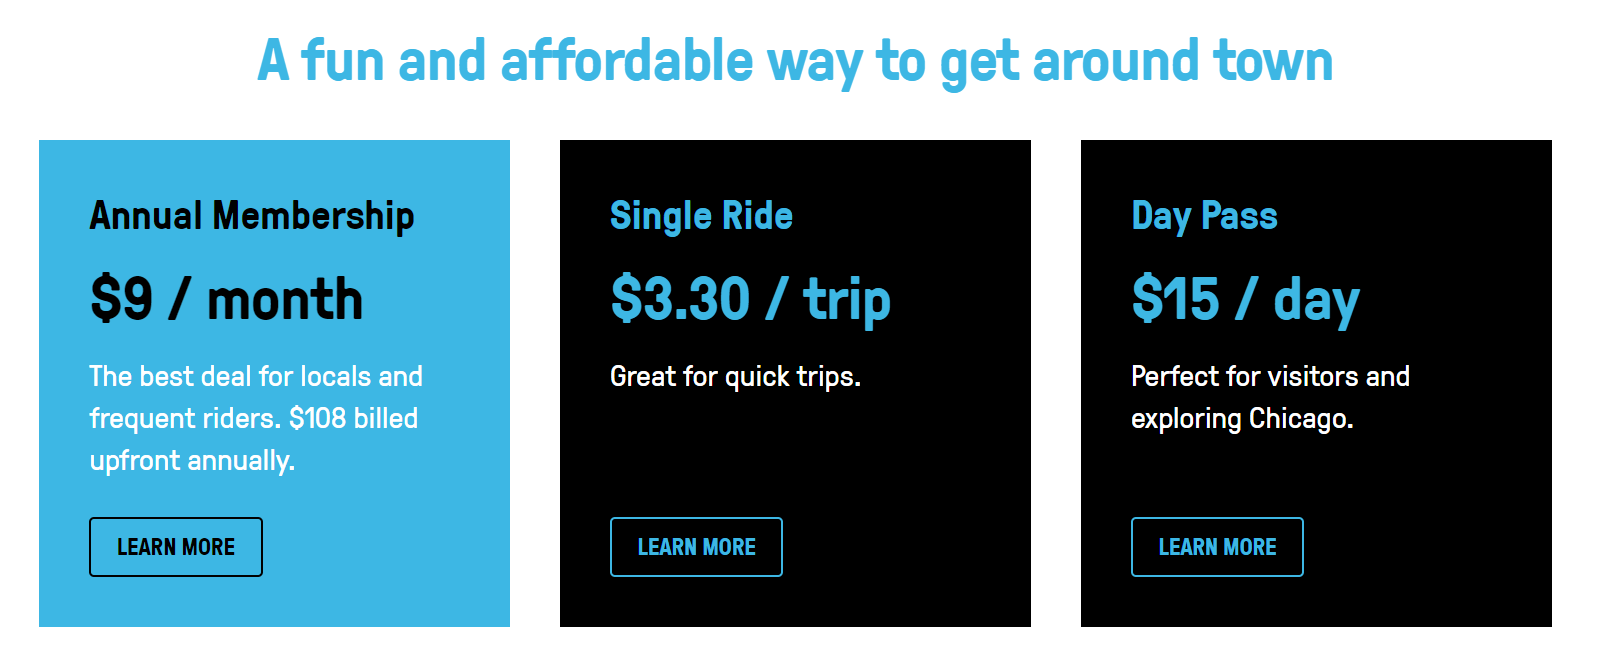

We also can see there is another rideable type - electric bike and we can find out the prices for rent of this kind of vehicle are different for members and casual categories, as well as different city zones. Now we know how users can handle the bikes according to the pricing plans, too.

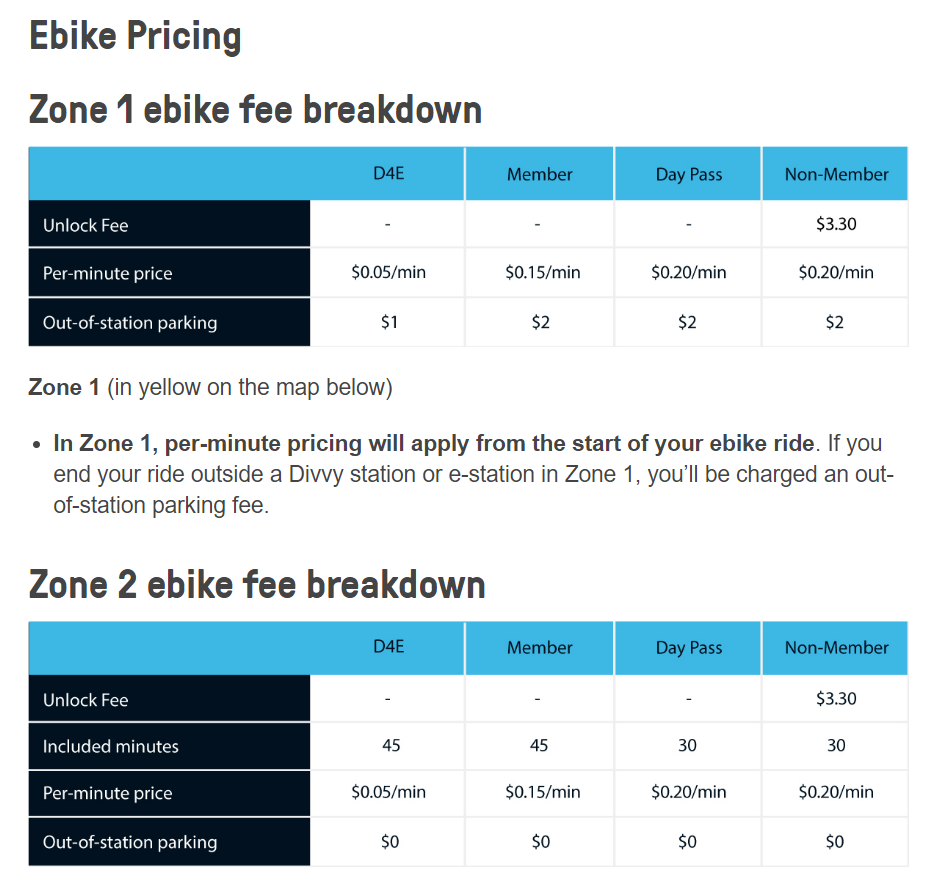

Let's go back to our spreadsheets. We see as well that there are files of more than 100MB, so I'll use R language for the following work with the dataframe.

In [1]:
#add necessary libraries
library(tidyverse)
library(lubridate)

#import csv files and concat it to a dataframe
jan_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202101-divvy-tripdata.csv")
feb_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202102-divvy-tripdata.csv")
mar_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202103-divvy-tripdata.csv")
apr_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202104-divvy-tripdata.csv")
may_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202105-divvy-tripdata.csv")
jun_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202106-divvy-tripdata.csv")
jul_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202107-divvy-tripdata.csv")
aug_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202108-divvy-tripdata.csv")
sep_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202109-divvy-tripdata.csv")
oct_2021 <- read_csv("../input/divvy-tripdata-nov2020-oct2021/202110-divvy-tripdata.csv")
cyclistic_2021 = bind_rows(jan_2021, feb_2021, mar_2021, apr_2021, may_2021, jun_2021, jul_2021, aug_2021, sep_2021, oct_2021)

rm("jan_2021", "feb_2021", "mar_2021", "apr_2021", "may_2021", "jun_2021", "jul_2021", "aug_2021", "sep_2021", "oct_2021")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Rows: 96834 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49622 Columns: 13

── Column specification 

In [2]:
#check our dataframe, names of columns, types of data
summary(cyclistic_2021)

   ride_id          rideable_type        started_at                 
 Length:4987545     Length:4987545     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-01 09:37:20  
 Mode  :character   Mode  :character   Median :2021-07-21 10:33:32  
                                       Mean   :2021-07-14 17:21:42  
                                       3rd Qu.:2021-09-06 10:54:51  
                                       Max.   :2021-10-31 23:59:49  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:4987545     Length:4987545    
 1st Qu.:2021-06-01 10:00:56   Class :character   Class :character  
 Median :2021-07-21 10:56:23   Mode  :character   Mode  :character  
 Mean   :2021-07-14 17:44:31                                        
 3rd Qu.:2021-09-06 11:21:20                                        
 Max.   :2021-11-03 21:45:48      

In [3]:
#format data types of columns and add more columns that we will use for the analysis
cyclistic_2021$date <- as.Date(cyclistic_2021$started_at)
cyclistic_2021$month <- format(as.Date(cyclistic_2021$date), "%m")
cyclistic_2021$day <- format(as.Date(cyclistic_2021$date), "%d")
cyclistic_2021$hour <- format(as.POSIXct(cyclistic_2021$started_at), "%H:%M")
cyclistic_2021$year <- format(as.Date(cyclistic_2021$date), "%Y")
cyclistic_2021$day_of_week <- format(as.Date(cyclistic_2021$date), "%A")
#add ride length column as a difference between end time and start time of a trip in minutes
cyclistic_2021$ride_length <- as.numeric(as.character(difftime(cyclistic_2021$ended_at, cyclistic_2021$started_at, units = 'mins')))
summary(cyclistic_2021)

   ride_id          rideable_type        started_at                 
 Length:4987545     Length:4987545     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-01 09:37:20  
 Mode  :character   Mode  :character   Median :2021-07-21 10:33:32  
                                       Mean   :2021-07-14 17:21:42  
                                       3rd Qu.:2021-09-06 10:54:51  
                                       Max.   :2021-10-31 23:59:49  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:4987545     Length:4987545    
 1st Qu.:2021-06-01 10:00:56   Class :character   Class :character  
 Median :2021-07-21 10:56:23   Mode  :character   Mode  :character  
 Mean   :2021-07-14 17:44:31                                        
 3rd Qu.:2021-09-06 11:21:20                                        
 Max.   :2021-11-03 21:45:48      

In [4]:
#How many unique values we have in our dataframe
cyclistic_2021 %>%
summarise_all(n_distinct)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,hour,year,day_of_week,ride_length
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4987545,3,4128676,4122649,812,799,809,797,360997,342308,421829,385156,2,304,10,31,1440,1,7,25039


<H2 id="cleaning">Data cleaning</H2>For the year 2021 there are 4.98 mil rows with data. And from the 2020 analysis I already know there is a category that's changed. Cyclistic now refers to all pedal bikes as "classic".

In [5]:
#Let's replace docked_bike rideable type to classic bike up to current categories the company is using
cyclistic_2021 <- cyclistic_2021 %>%
mutate(rideable_type = replace(rideable_type, rideable_type == "docked_bike", "classic_bike"))%>%
arrange(started_at)
#I'll also arrange the df by starting time

Let's take a look at any inconsistencies in the data with all the NA values.

In [6]:
#How many observations are missing in every column
colSums(is.na(cyclistic_2021))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            564456             564453             606485             606485 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

We see that there are quite a lot of station names and IDs missing. It could be due to new stations opening, changes in IDs for a better work with the database. We don't know the exact reason, but we'll try to find those and fill the columns.

In [7]:
#Let's filter with station name column and fill station ID missing
fill_missing_start_id <- cyclistic_2021 %>%
group_by(start_station_name)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_name, value=start_station_id)%>%
fill(start_station_id)%>%
ungroup()
sum(is.na(fill_missing_start_id$start_station_id))
colSums(is.na(fill_missing_start_id))

#We see that there are less NA start ID now, update the dataframe
cyclistic_2021 <- cyclistic_2021 %>%
mutate(start_station_id = fill_missing_start_id$start_station_id)

#Let's filter with station ID column and fill station name missing
fill_missing_start_name <- cyclistic_2021 %>%
group_by(start_station_id)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_id, value=start_station_name)%>%
fill(start_station_name)%>%
ungroup()
sum(is.na(fill_missing_start_name$start_station_name))
colSums(is.na(fill_missing_start_name))

#We see that there are less NA start ID now, update the dataframe
cyclistic_2021 <- cyclistic_2021 %>%
mutate(start_station_name = fill_missing_start_name$start_station_name) %>%
arrange(started_at)

[1] 235423

start_station_name   start_station_id 
            564456             235423

[1] 235423

start_station_name   start_station_id 
            235423             235423

In [8]:
#Fill missing start_station_IDs referring the coordinates every trip has
#Dataframe with missing values
df_missing <- cyclistic_2021 %>%
  filter(is.na(start_station_id))

#Dataframe without NA in that column
df_nomissings <- cyclistic_2021 %>%
  filter(!is.na(start_station_id))

#I want to use the closest coordinates to find station names - s2_closest_feature
library(s2)

In [9]:
missings_s2 <- s2_lnglat(df_missing$start_lat, df_missing$start_lng)
nomissings_s2 <- s2_lnglat(df_nomissings$start_lat, df_nomissings$start_lng)
df_missing$start_station_id <- cyclistic_2021$start_station_id[s2_closest_feature(missings_s2, nomissings_s2)]

In [10]:
#Check how many null left in the column
sum(is.na(df_missing$start_station_id))

[1] 36330

In [11]:
df_missing%>%
head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,hour,year,day_of_week,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
A3F8D895163BBB49,electric_bike,2021-01-01 00:02:05,2021-01-01 00:12:39,NA,TA1305000005,NA,NA,41.98,-87.65,41.98000,-87.66000,member,2021-01-01,01,01,00:02,2021,Friday,10.5666667
48E312E013F3046C,electric_bike,2021-01-01 00:29:22,2021-01-01 00:43:44,NA,15544,NA,NA,41.96,-87.72,41.93000,-87.71000,member,2021-01-01,01,01,00:29,2021,Friday,14.3666667
4D6C973679D0F6C4,electric_bike,2021-01-01 00:58:52,2021-01-01 01:14:59,NA,NA,Ashland Ave & Chicago Ave,13247,41.91,-87.70,41.89601,-87.66777,casual,2021-01-01,01,01,00:58,2021,Friday,16.1166667
4E6DADE941019A73,electric_bike,2021-01-01 00:59:26,2021-01-01 01:29:42,NA,13036,NA,NA,41.95,-87.65,41.88000,-87.65000,member,2021-01-01,01,01,00:59,2021,Friday,30.2666667
CC53010B691744A9,electric_bike,2021-01-01 01:04:17,2021-01-01 01:04:27,NA,TA1307000039,NA,NA,41.90,-87.64,41.90000,-87.64000,casual,2021-01-01,01,01,01:04,2021,Friday,0.1666667
4E1D24E66B222893,electric_bike,2021-01-01 01:04:26,2021-01-01 01:11:39,NA,KA1504000104,NA,NA,41.96,-87.71,41.95000,-87.71000,casual,2021-01-01,01,01,01:04,2021,Friday,7.2166667


In [12]:
#We bind dataframes with existing and filled values and arrange it by started_at again
cyclistic_2021_filled <- bind_rows(df_missing, df_nomissings)
cyclistic_2021_filled <- cyclistic_2021_filled %>%
arrange(started_at)

In [13]:
colSums(is.na(cyclistic_2021_filled))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            235423              36330             606485             606485 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

In [14]:
#Fill missing end station IDs
#Dataframe with missing values
df_missing <- cyclistic_2021_filled %>%
  filter(is.na(end_station_id))

#dataframe without NA in that column
df_nomissings <- cyclistic_2021_filled %>%
  filter(!is.na(end_station_id))

In [15]:
missings_s2 <- s2_lnglat(df_missing$end_lat, df_missing$end_lng)
nomissings_s2 <- s2_lnglat(df_nomissings$end_lat, df_nomissings$end_lng)
df_missing$end_station_id <- cyclistic_2021_filled$end_station_id[s2_closest_feature(missings_s2, nomissings_s2)]

In [16]:
cyclistic_2021_filled <- bind_rows(df_missing, df_nomissings)
cyclistic_2021_filled <- cyclistic_2021_filled%>%
arrange(started_at)

colSums(is.na(cyclistic_2021_filled))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            235423              36330             606485              81446 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

In [17]:
#Let's switch the filters and apply them to the names columns as well.
fill_missing_start_name <- cyclistic_2021_filled %>%
group_by(start_station_id)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_id, value=start_station_name)%>%
fill(start_station_name)%>%
ungroup()
sum(is.na(fill_missing_start_name$start_station_name))
colSums(is.na(fill_missing_start_name))

#We keep in mind that v2 is about filtering and filling missing stations IDs and names
cyclistic_2021_v2 <- cyclistic_2021_filled %>%
mutate(start_station_name = fill_missing_start_name$start_station_name)%>%
arrange(started_at)

colSums(is.na(cyclistic_2021_v2))

[1] 36400

start_station_name   start_station_id 
             36400              36330

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
             36400              36330             606485              81446 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

In [18]:
cyclistic_2021_v2$start_station_id <- gsub("*\\.0*", "", cyclistic_2021_v2$start_station_id)
cyclistic_2021_v2$end_station_id <- gsub("*\\.0*", "", cyclistic_2021_v2$end_station_id)

In [19]:
#Let's filter with ID column and fill station ID missing
fill_missing_start_id <- cyclistic_2021_v2 %>%
group_by(start_station_name)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_name, value=start_station_id)%>%
fill(start_station_id)%>%
ungroup()
sum(is.na(fill_missing_start_id$start_station_id))
colSums(is.na(fill_missing_start_id))

#We see that there are less NA start ID now, update the dataframe
cyclistic_2021_v2 <- cyclistic_2021_v2 %>%
mutate(start_station_id = fill_missing_start_id$start_station_id)

[1] 0

start_station_name   start_station_id 
             36400                  0

In [20]:
#Let's run the filter for names one more time.
fill_missing_start_name <- cyclistic_2021_v2 %>%
group_by(start_station_id)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_id, value=start_station_name)%>%
fill(start_station_name)%>%
ungroup()
sum(is.na(fill_missing_start_name$start_station_name))
colSums(is.na(fill_missing_start_name))

#We keep in mind that v2 is about filtering and filling missing stations IDs and names
cyclistic_2021_v2 <- cyclistic_2021_v2 %>%
mutate(start_station_name = fill_missing_start_name$start_station_name)%>%
arrange(started_at)

colSums(is.na(cyclistic_2021_v2))

[1] 239

start_station_name   start_station_id 
               239                  0

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
               239                  0             606485              81446 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

In [21]:
rm("fill_missing_start_id", "fill_missing_start_name", "cyclistic_2021", "missings_s2", "nomissings_s2")

In [22]:
#Filter and fill end station ID
fill_missing_end_id <- cyclistic_2021_v2 %>%
group_by(end_station_name)%>%
select(end_station_name, end_station_id)%>%
gather(key=end_station_name, value=end_station_id)%>%
fill(end_station_id)%>%
ungroup()
sum(is.na(fill_missing_end_id$end_station_id))

#Mutate our dataframe with filled columns
cyclistic_2021_v2 <- cyclistic_2021_v2 %>%
mutate(end_station_id = fill_missing_end_id$end_station_id)

[1] 0

In [23]:
colSums(is.na(cyclistic_2021_v2))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
               239                  0             606485                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4436               4436 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

In [24]:
#Let's switch the filters and apply them to the names columns as well.
fill_missing_end_name <- cyclistic_2021_v2 %>%
group_by(end_station_id)%>%
select(end_station_name, end_station_id)%>%
gather(key=end_station_id, value=end_station_name)%>%
fill(end_station_name)%>%
ungroup()
sum(is.na(fill_missing_end_name$end_station_name))

#We keep in mind that v2 is about filtering and filling missing stations IDs and names
cyclistic_2021_v2 <- cyclistic_2021_v2 %>%
mutate(end_station_name = fill_missing_end_name$end_station_name)

[1] 172

For the moment NA values for end stations are not critical, we have fewer NA values (4436) in coordinates columns, so most likely it's a question of addressing those coordinates to the right station name and ID. Let's see if it will be eliminated with further manipulations.

Right now let's look at ride length and we see that there are some negative values to be filtered out. Furthermore, trips of less than 1 minute would also be mostly a mistake, system tests, or a change of mind, rather than a normal customer behavior.

In [25]:
sum(cyclistic_2021_v2$ride_length < 1)

[1] 75417

In [26]:
cyclistic_2021_v3 <- subset(cyclistic_2021_v2, ride_length > 1)

cyclistic_2021_v3 %>%
summarise_all(n_distinct)

colSums(is.na(cyclistic_2021_v3))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,hour,year,day_of_week,ride_length
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4911357,2,4076376,4070426,812,797,809,795,358860,340188,419964,383337,2,304,10,31,1440,1,7,24925


ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
               222                  0                160                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4404               4404 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

We created a ride_length column and filled missing stations names with NA filters. Then we could start checking the differences between the casuals and members patterns: check the number of rides, min, and max, average and median ride_lengths. What we find out is that for some stations there are not so many rides, but there are long-duration trips that can skew the results of our analysis.

From the website, we could find out the maximum length of rides without additional fees the company is expecting users to have, so we'll assume all the extremum values to be outliers, e.g., technical maintenance, bike theft, technical issues with bike locking that can lead to customers complaints. If I was a part of Divvy team, I would have found out the treshold when the company stops counting as a regular ride.

As we can calculate, every ride that is close to 12 hours in a row is worth of annual subscription. The only type of customer that could be close to that amount of time is a casual rider with a daily pass. But from the pricing plans on the website, we know that it shouldn't be 12 consecutive hours riding the same bike. Every 3 hours it should be docked and leads to additional fees for the customers.

Let's define a threshold as 8 hours to be the maximum ride_length (480 mins). And see how many observations we are losing.

In [27]:
sum(cyclistic_2021_v3$ride_length > 480)

[1] 8565

Then we filter rows with those trips out.

In [28]:
cyclistic_2021_v4 <- subset(cyclistic_2021_v3, ride_length < 480)

In [29]:
ls()

[1] "auth"                      "cyclistic_2021_filled"    
 [3] "cyclistic_2021_v2"         "cyclistic_2021_v3"        
 [5] "cyclistic_2021_v4"         "df_missing"               
 [7] "df_nomissings"             "fill_missing_end_id"      
 [9] "fill_missing_end_name"     "get_user_secret"          
[11] "GET_USER_SECRET_ENDPOINT"  "KAGGLE_BASE_URL"          
[13] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[15] "TokenBigQueryKernel"

In [30]:
#Get rid of variables we don't need anymore
rm('cyclistic_2021_v2', 'cyclistic_2021_filled', 'end_station_id_missing_data', 'end_station_name_missing_data', 'fill_missing_end_name', 'missings_s2', 'nomissings_s2', 'cyclistic_2021_filled', 'start_station_name_missing_data', 'start_station_id_missing_data', 'fill_missing_end_id', 'df_nomissings')

Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'end_station_id_missing_data' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'end_station_name_missing_data' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'missings_s2' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'nomissings_s2' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'cyclistic_2021_filled' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'start_station_name_missing_data' not found”
Warning message in rm("cyclistic_2021_v2", "cyclistic_2021_filled", "end_station_id_missing_data", :
“object 'start_station_id_mis

In [31]:
#Check for missing station names and IDs in start and end columns throughout the dataframe
start_station_name_missing_data <- filter(cyclistic_2021_v4, (is.na(start_station_name)))
start_station_id_missing_data <- filter(cyclistic_2021_v4, (is.na(start_station_id)))
end_station_name_missing_data <- filter(cyclistic_2021_v4, (is.na(end_station_name)))
end_station_id_missing_data <- filter(cyclistic_2021_v4, (is.na(end_station_id)))

In [32]:
start_station_name_missing_data%>%
tail()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,hour,year,day_of_week,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
99C666E07A854335,electric_bike,2021-01-07 15:16:06,2021-01-07 16:05:55,NA,20246,Morgan St & 31st St,TA1308000046,41.93,-87.69,41.83783,-87.65124,casual,2021-01-07,01,07,15:16,2021,Thursday,49.816667
361961A32670A0A8,electric_bike,2021-01-07 15:38:33,2021-01-07 15:53:16,NA,20246,63rd St Beach,15491,41.79,-87.60,41.78118,-87.57605,member,2021-01-07,01,07,15:38,2021,Thursday,14.716667
23145C2217017EA8,electric_bike,2021-01-07 15:44:51,2021-01-07 16:26:56,NA,20246,Western Ave & Lunt Ave,RP-005,41.93,-87.69,42.00860,-87.69052,member,2021-01-07,01,07,15:44,2021,Thursday,42.083333
683E2EA9A2514A77,electric_bike,2021-01-07 15:49:09,2021-01-07 16:01:39,NA,20246,Sheffield Ave & Wrightwood Ave,TA1309000023,41.90,-87.68,41.90000,-87.69000,member,2021-01-07,01,07,15:49,2021,Thursday,12.500000
255EE77F8CBA6CFF,electric_bike,2021-01-07 17:38:05,2021-01-07 17:40:09,NA,20246,Dayton St & North Ave,13058,41.95,-87.71,41.95000,-87.72000,member,2021-01-07,01,07,17:38,2021,Thursday,2.066667
DA207C40EAE22CAF,electric_bike,2021-01-07 17:43:56,2021-01-07 18:00:58,NA,20246,Greenview Ave & Jarvis Ave,520,42.04,-87.70,42.01600,-87.66857,member,2021-01-07,01,07,17:43,2021,Thursday,17.033333


In [33]:
#Filter those stations without names and try to find their values in other rows.
filter(cyclistic_2021_v4, start_station_id %in% unique(start_station_name_missing_data$start_station_id)) %>%
select(start_station_name, start_station_id) %>%
unique()%>%
arrange(start_station_id)
filter(cyclistic_2021_v4, end_station_id %in% unique(start_station_name_missing_data$start_station_id)) %>%
select(end_station_name, end_station_id) %>%
unique()%>%
arrange(end_station_id)

start_station_name,start_station_id
<chr>,<chr>
NA,13022
Streeter Dr & Grand Ave,13022
NA,13036
Michigan Ave & Madison St,13036
NA,13042
Michigan Ave & Oak St,13042
NA,13074
Broadway & Wilson Ave,13074
Broadway & Wilson - Truman College Vaccination Site,13074


end_station_name,end_station_id
<chr>,<chr>
NA,13022
Streeter Dr & Grand Ave,13022
Michigan Ave & Madison St,13036
Michigan Ave & Oak St,13042
Broadway & Wilson Ave,13074
Broadway & Wilson - Truman College Vaccination Site,13074
Lincoln Ave & Waveland Ave,13253
Damen Ave & Clybourn Ave,13271
Broadway & Cornelia Ave,13278


In [34]:
#Let's run the filter for names one more time.
fill_missing_start_name <- cyclistic_2021_v4 %>%
group_by(start_station_id)%>%
select(start_station_name, start_station_id)%>%
gather(key=start_station_id, value=start_station_name)%>%
fill(start_station_name, .direction = "up")%>%
ungroup()
sum(is.na(fill_missing_start_name$start_station_name))
colSums(is.na(fill_missing_start_name))

#Update our dataframe
cyclistic_2021_v4 <- cyclistic_2021_v4 %>%
mutate(start_station_name = fill_missing_start_name$start_station_name)%>%
arrange(started_at)

#Let's switch the filters and apply them to the names columns as well.
fill_missing_end_name <- cyclistic_2021_v4 %>%
group_by(end_station_id)%>%
select(end_station_name, end_station_id)%>%
gather(key=end_station_id, value=end_station_name)%>%
fill(end_station_name, .direction = "up")%>%
ungroup()
sum(is.na(fill_missing_end_name$end_station_name))

cyclistic_2021_v4 <- cyclistic_2021_v4 %>%
mutate(end_station_name = fill_missing_end_name$end_station_name)

[1] 0

start_station_name   start_station_id 
                 0                  0

[1] 0

In [35]:
colSums(is.na(cyclistic_2021_v4))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               1564               1564 
     member_casual               date              month                day 
                 0                  0                  0                  0 
              hour               year        day_of_week        ride_length 
                 0                  0                  0                  0

We filled all the station names and it's time to summarize how members and casual riders use Cyclistic service.

In [36]:
cyclistic_2021_v4 %>%
group_by(member_casual, month) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(month, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,month,number_of_rides,min_by,max_by,average_duration,median_duration
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
casual,01,17780,1.033333,478.4167,19.86404,12.416667
member,01,77507,1.016667,461.1500,12.38749,8.816667
casual,02,9862,1.016667,438.0500,26.63354,16.216667
member,02,38556,1.016667,479.9500,14.73364,10.316667
casual,03,82789,1.016667,479.9833,29.49036,18.866667
member,03,142307,1.016667,479.9167,13.82548,10.133333
casual,04,134375,1.016667,479.9833,29.35147,18.216667
member,04,197362,1.016667,479.9000,14.43087,10.566667
casual,05,252305,1.016667,479.9833,30.04303,18.983333


In [37]:
aggregate(cyclistic_2021_v4$ride_length ~ cyclistic_2021_v4$member_casual, FUN = mean)
aggregate(cyclistic_2021_v4$ride_length ~ cyclistic_2021_v4$member_casual, FUN = median)
cyclistic_2021_v4$day_of_week <- ordered(cyclistic_2021_v4$day_of_week, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

cyclistic_2021_v4$member_casual,cyclistic_2021_v4$ride_length
<chr>,<dbl>
casual,26.39020
member,13.77386


cyclistic_2021_v4$member_casual,cyclistic_2021_v4$ride_length
<chr>,<dbl>
casual,16.60000
member,10.13333


<H2 id="plotsanalysis">Plots and analysis</H2>We need to segment it more for better understanding, cause right now from the pricing plans we assume that ebike and bike riders would use it differently. Also, casual riders who obtain day pass and single riders vs members is another segment.

<H3 id="general">General group</H3>

In [38]:
#Group data by month for further visualization
plot_cyclistic_2021_month <- cyclistic_2021_v4 %>%
group_by(member_casual, month, rideable_type) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(month, rideable_type, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'month'. You can override using the `.groups` argument.



In [39]:
#Group data by day of week for further visualization
plot_cyclistic_2021_day_of_week <- cyclistic_2021_v4 %>%
group_by(member_casual, day_of_week, rideable_type) %>%
summarise(min_by=min(ride_length), max_by=max(ride_length), number_of_rides = n(), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(day_of_week, member_casual, rideable_type, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can override using the `.groups` argument.



In [40]:
#Group data by time of the day for further visualization
plot_cyclistic_2021_time <- cyclistic_2021_v4 %>%
group_by(member_casual, hour, rideable_type) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(hour, rideable_type, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'hour'. You can override using the `.groups` argument.



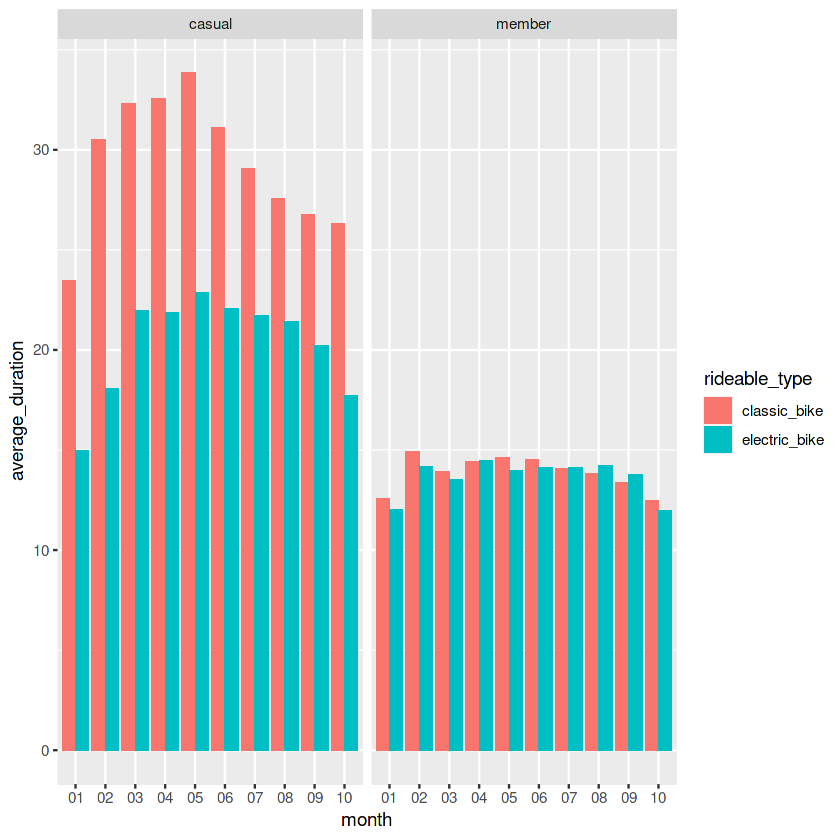

In [41]:
#Average duration of trips by months
plot_cyclistic_2021_month %>%
ggplot(aes(x = month, y = average_duration, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

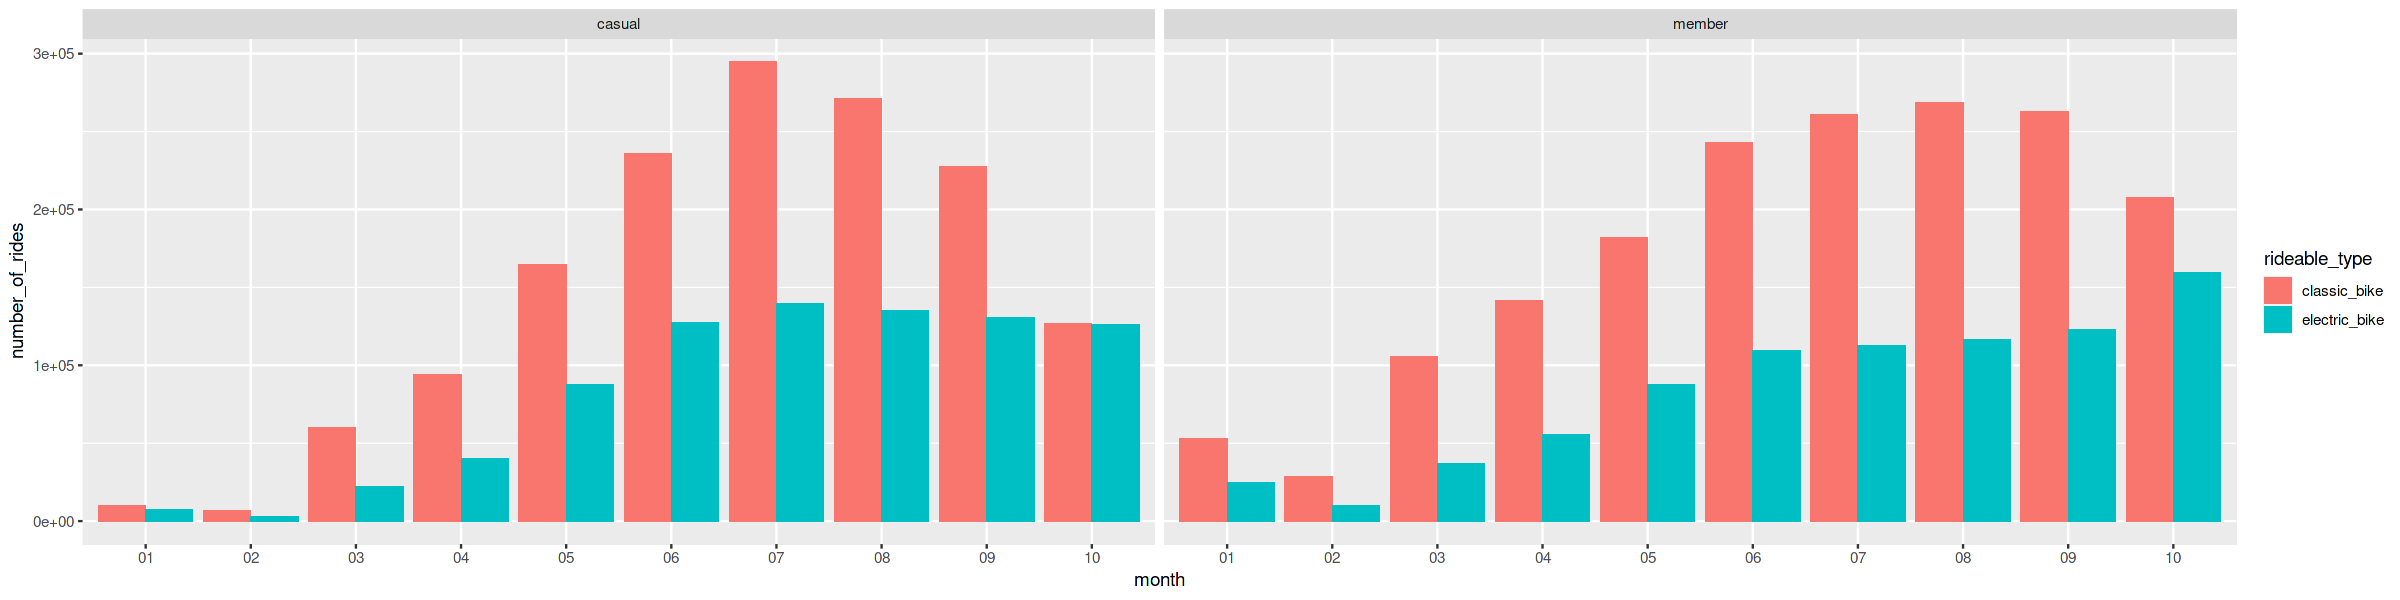

In [42]:
#Number of rides by month
plot_cyclistic_2021_month %>%
ggplot(aes(x = month, y = number_of_rides, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

The two plots above show us that members tend to use e-bikes as long as classic bikes - short trips for both categories. And the number of rides trend shows that e-bikes use doesn't decline much even closer to the cold time of the year, both for casual riders and annual members.

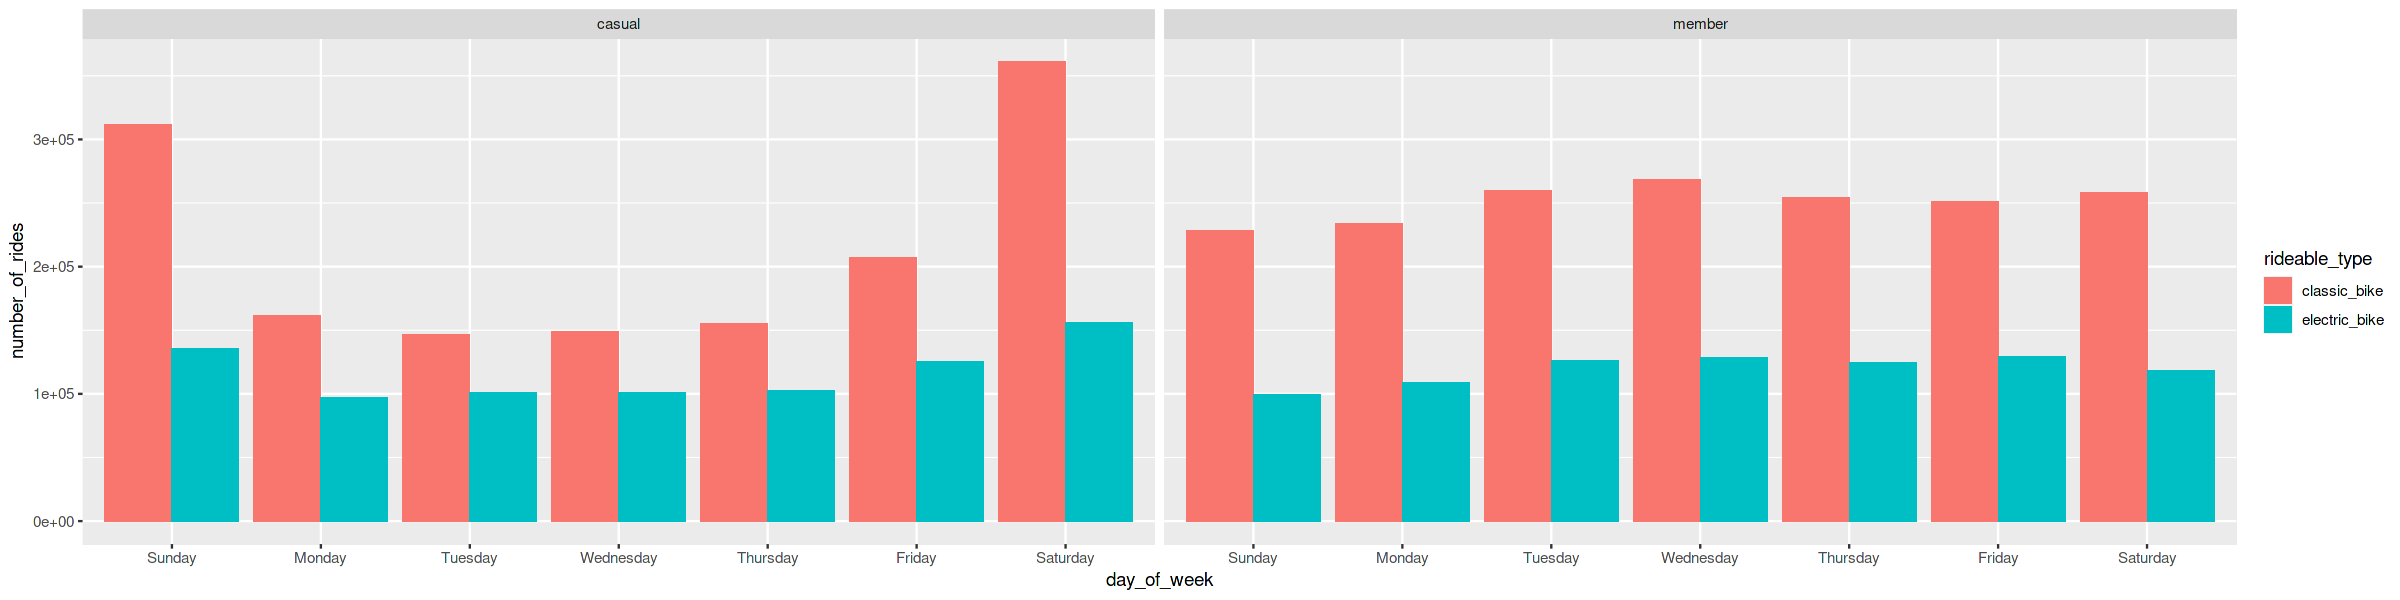

In [43]:
plot_cyclistic_2021_day_of_week %>%
ggplot(aes(x = day_of_week, y = number_of_rides, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

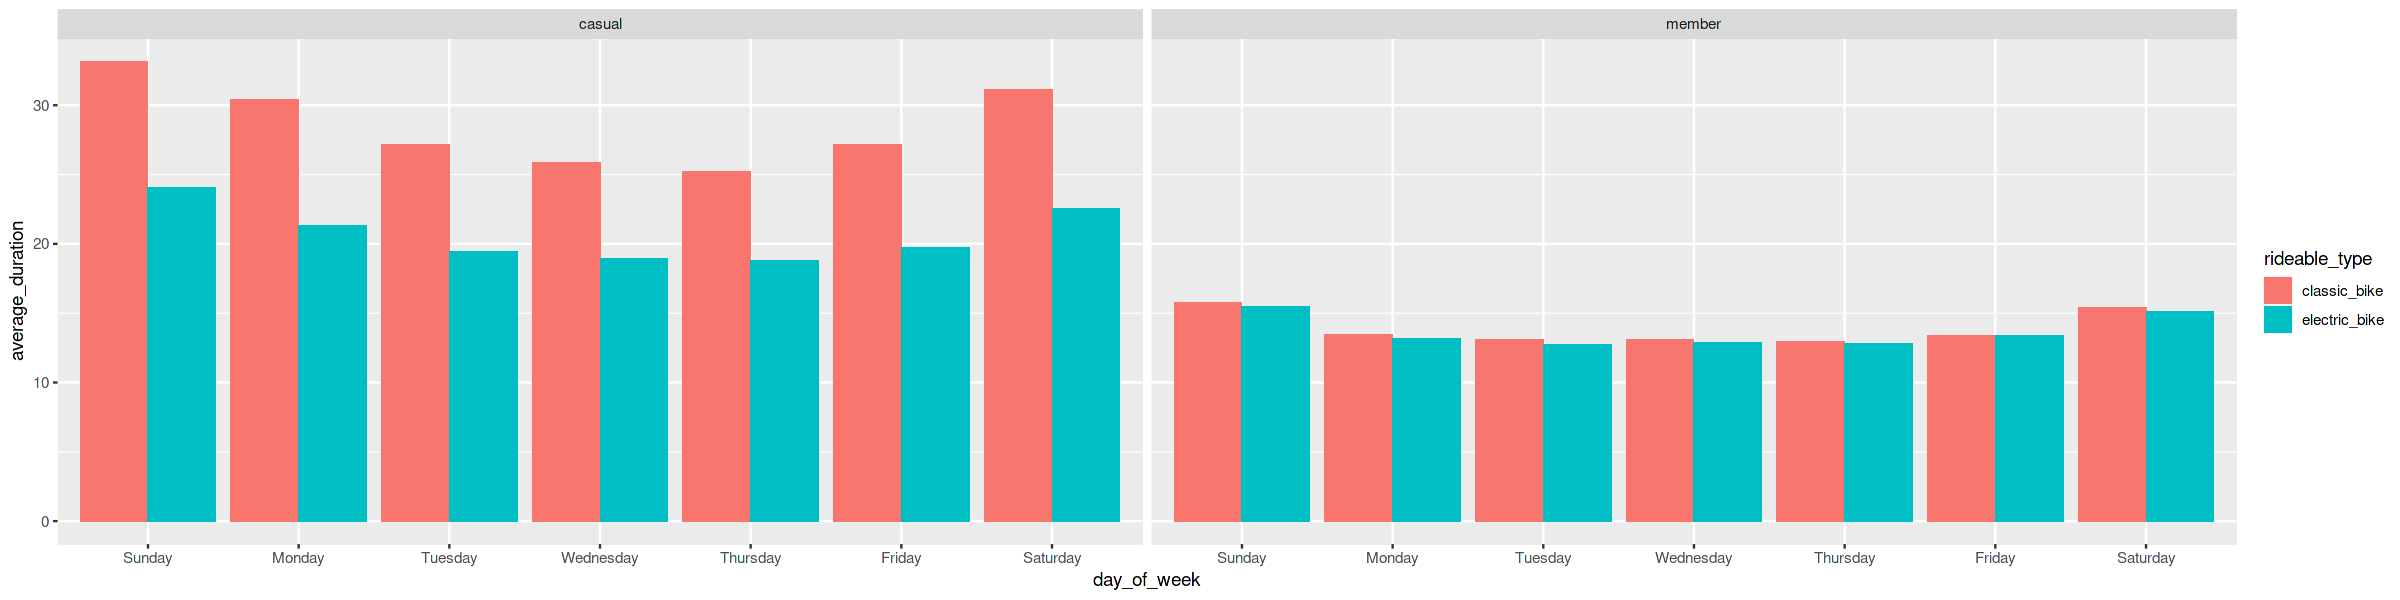

In [44]:
plot_cyclistic_2021_day_of_week %>%
ggplot(aes(x = day_of_week, y = average_duration, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

Trip duration and the number of rides, broken by days of the week, let us see, casual riders use classic bikes more on weekends. E-bikes are used by members and casual riders pretty much the same way during the week, with a slightly longer trip duration on weekends.

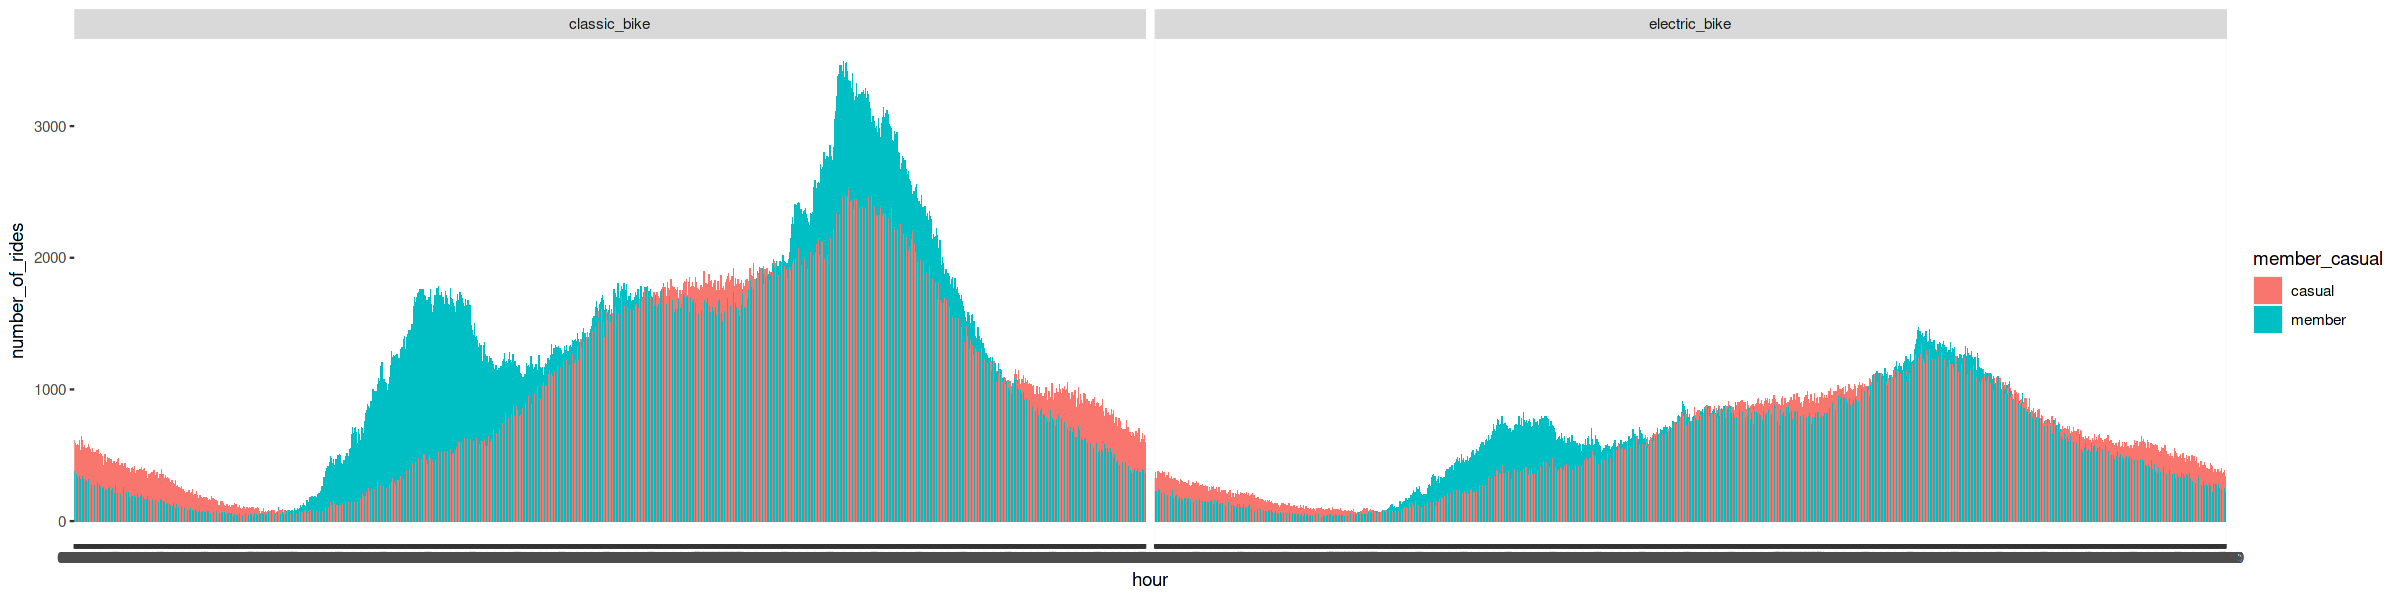

In [45]:
plot_cyclistic_2021_time %>%
ggplot(aes(x = hour, y = number_of_rides, fill = member_casual))+
geom_col(position = "dodge")+
facet_wrap(~rideable_type)
options(repr.plot.width = 20, repr.plot.height = 5)

We see from the hourly divided plot two peaks for rush hours when members use all kinds of vehicles before and after work. We will plot top used stations for both categories further.

To segment riders with daily passes, we simply make another subset with ride_length of more than 50 minutes. As we remember, the pricing plans are designed in a way that members and single-trip users will ride up to ~45 and ~30 min respectively. On average, for e-bikes it will be even less. Let's see what the ratio is.

In [46]:
#Approximate amount of casual riders using Cyclistic service with day passes  
sum(cyclistic_2021_v4$ride_length > 50)

[1] 315132

<H3 id="daypass">Day pass users</H3>

In [47]:
cyclistic_2021_v5 <- subset(cyclistic_2021_v4, ride_length > 50)

In [48]:
plot_cyclistic_2021_month <- cyclistic_2021_v5 %>%
group_by(member_casual, month, rideable_type) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(month, rideable_type, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'month'. You can override using the `.groups` argument.



In [49]:
plot_cyclistic_2021_day_of_week <- cyclistic_2021_v5 %>%
group_by(member_casual, day_of_week, rideable_type) %>%
summarise(min_by=min(ride_length), max_by=max(ride_length), number_of_rides = n(), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(day_of_week, member_casual, rideable_type)

`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can override using the `.groups` argument.



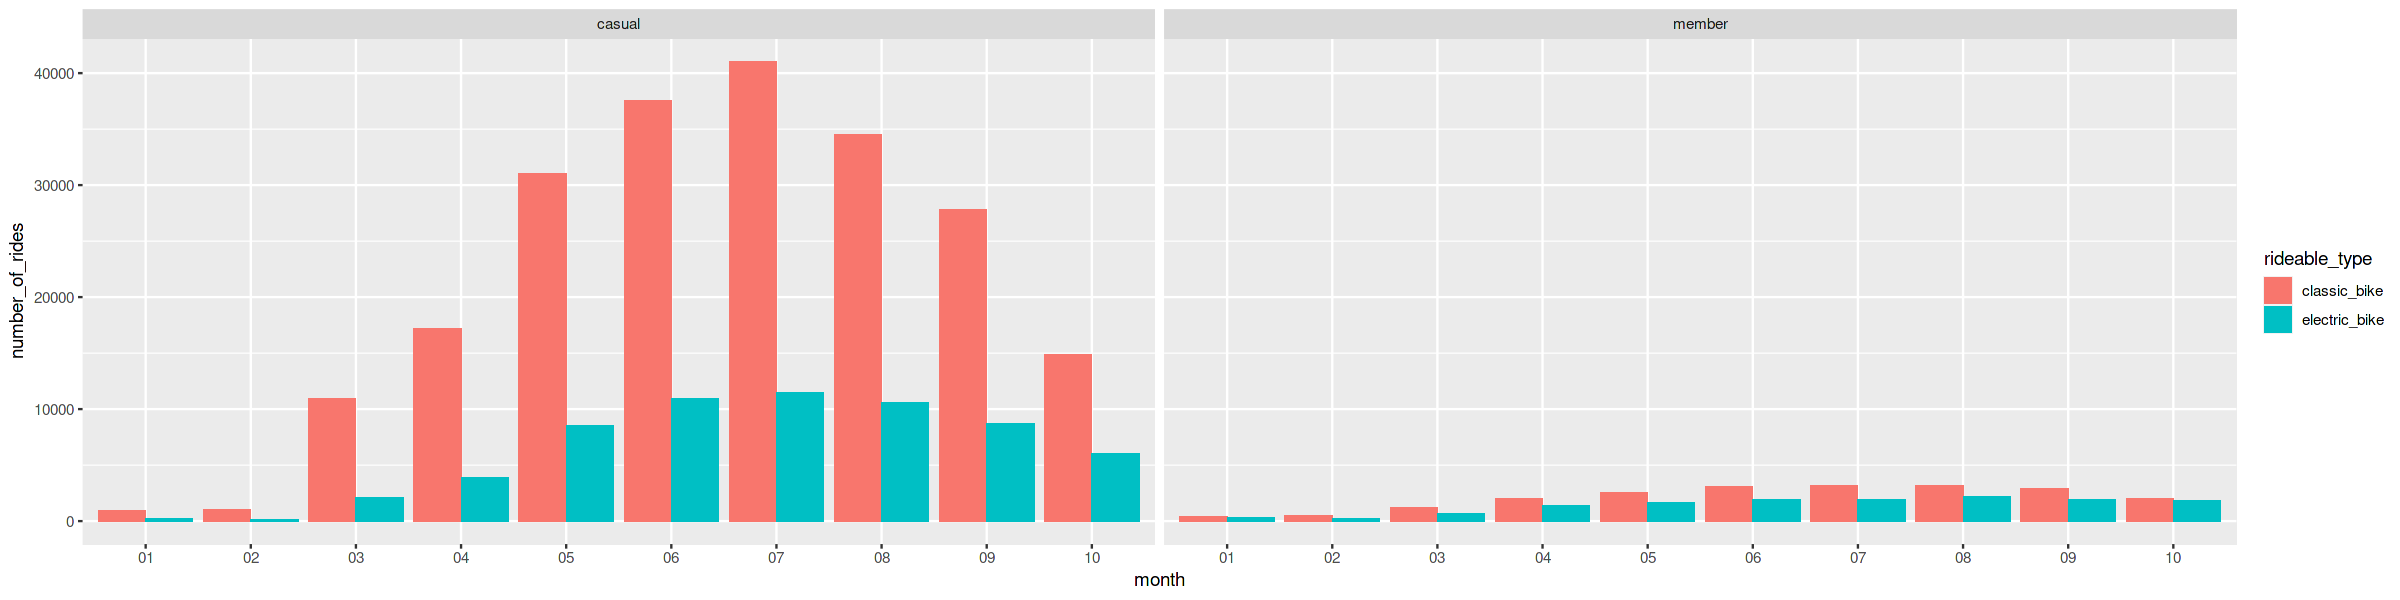

In [50]:
plot_cyclistic_2021_month %>%
ggplot(aes(x = month, y = number_of_rides, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 8)

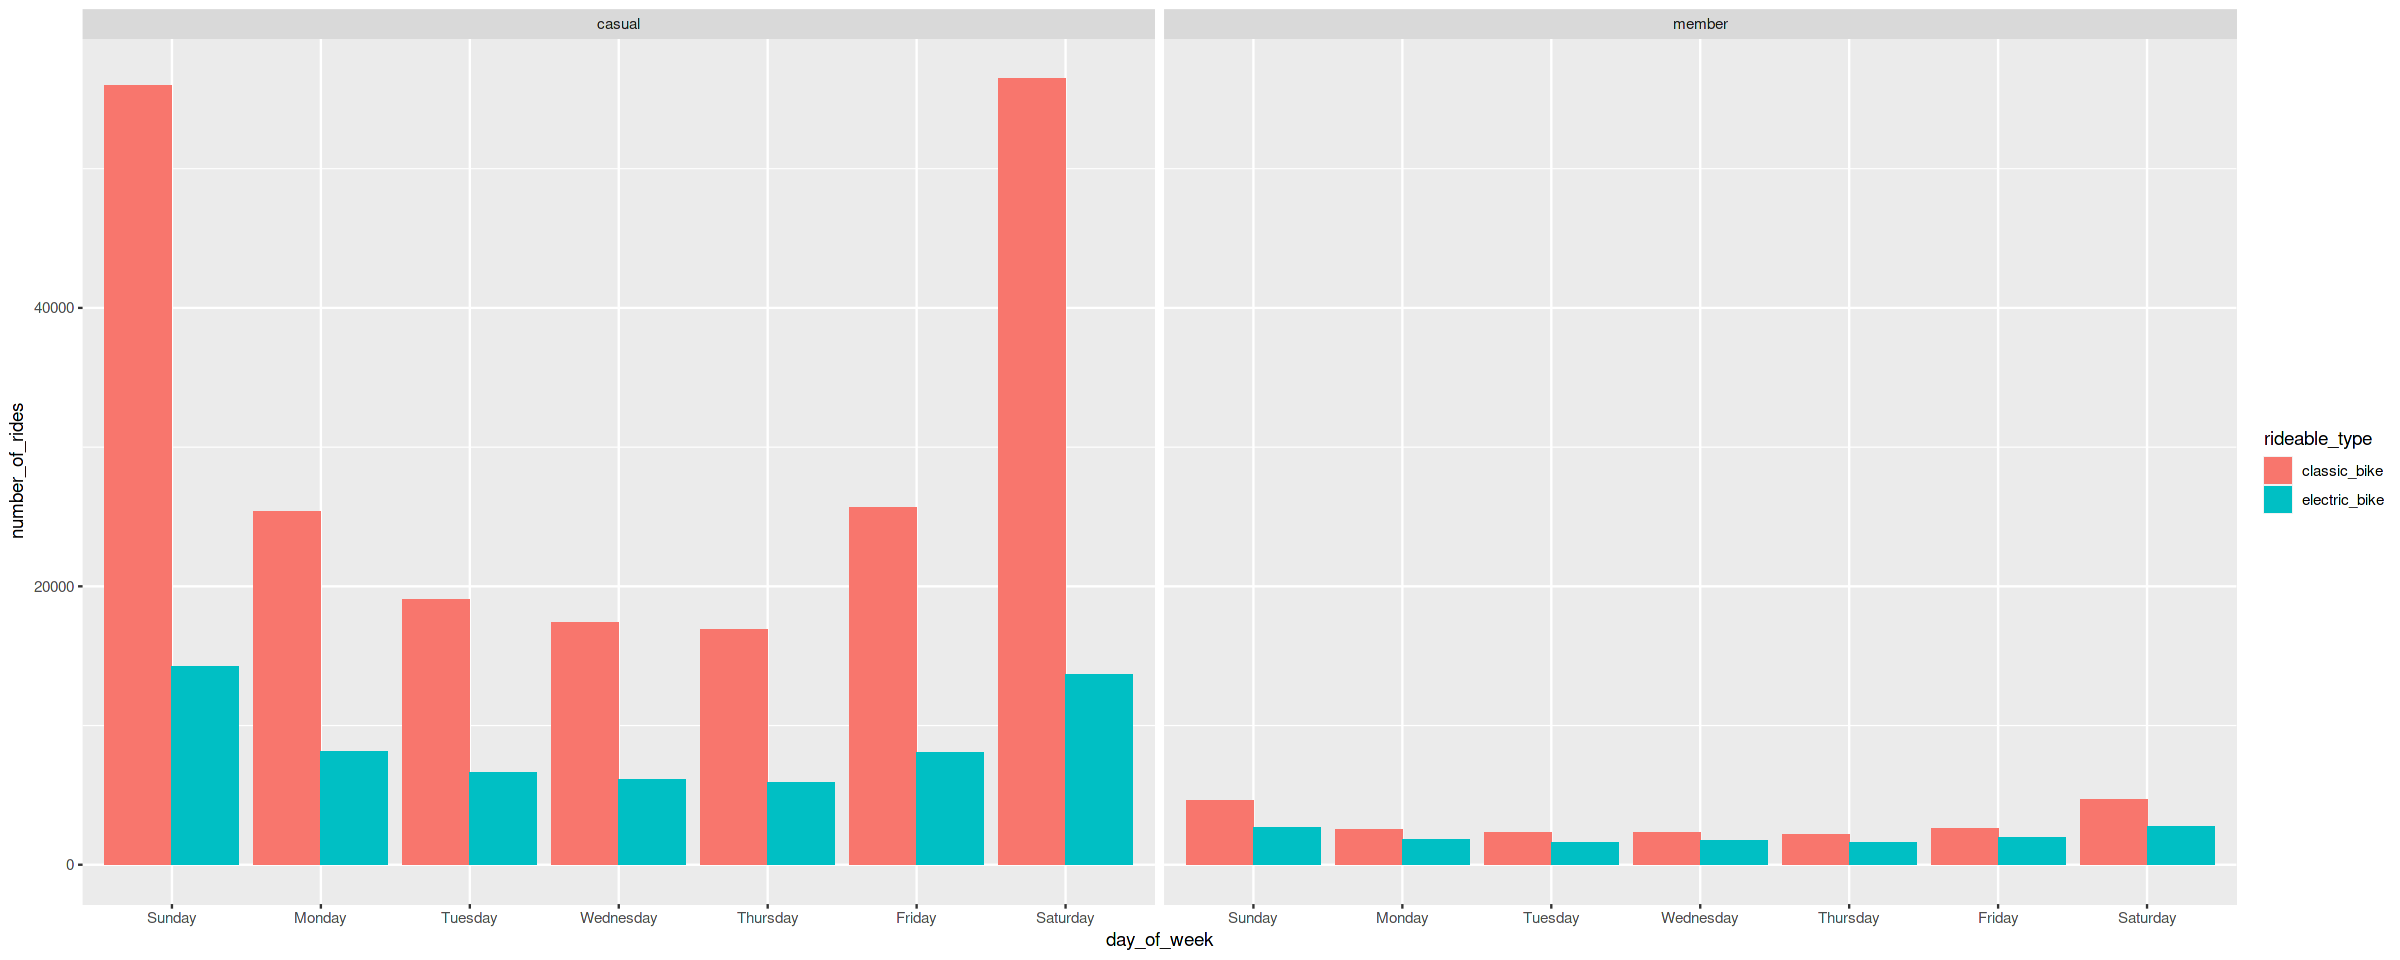

In [51]:
plot_cyclistic_2021_day_of_week %>%
arrange(day_of_week) %>%
ggplot(aes(x = day_of_week, y = number_of_rides, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

We see clearer that people with day passes use bikes mostly on weekends in warm months for entertaining purposes and almost don't use in winter, so it may be harder to engage them with annual passes.

<H3 id="singleride">Single ride users vs Members</H3>

In [52]:
cyclistic_2021_v6 <- subset(cyclistic_2021_v4, ride_length < 50)

In [53]:
plot_cyclistic_2021_month <- cyclistic_2021_v6 %>%
group_by(member_casual, month, rideable_type) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(month, rideable_type, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'month'. You can override using the `.groups` argument.



In [54]:
plot_cyclistic_2021_day_of_week <- cyclistic_2021_v6 %>%
group_by(member_casual, day_of_week, rideable_type) %>%
summarise(min_by=min(ride_length), max_by=max(ride_length), number_of_rides = n(), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(day_of_week, member_casual, rideable_type)

`summarise()` has grouped output by 'member_casual', 'day_of_week'. You can override using the `.groups` argument.



In [55]:
plot_cyclistic_2021_time <- cyclistic_2021_v6 %>%
group_by(member_casual, hour, rideable_type) %>%
summarise(number_of_rides = n(), min_by=min(ride_length), max_by=max(ride_length), average_duration=mean(ride_length), median_duration=median(ride_length))%>%
arrange(hour, rideable_type, member_casual, number_of_rides, average_duration)

`summarise()` has grouped output by 'member_casual', 'hour'. You can override using the `.groups` argument.



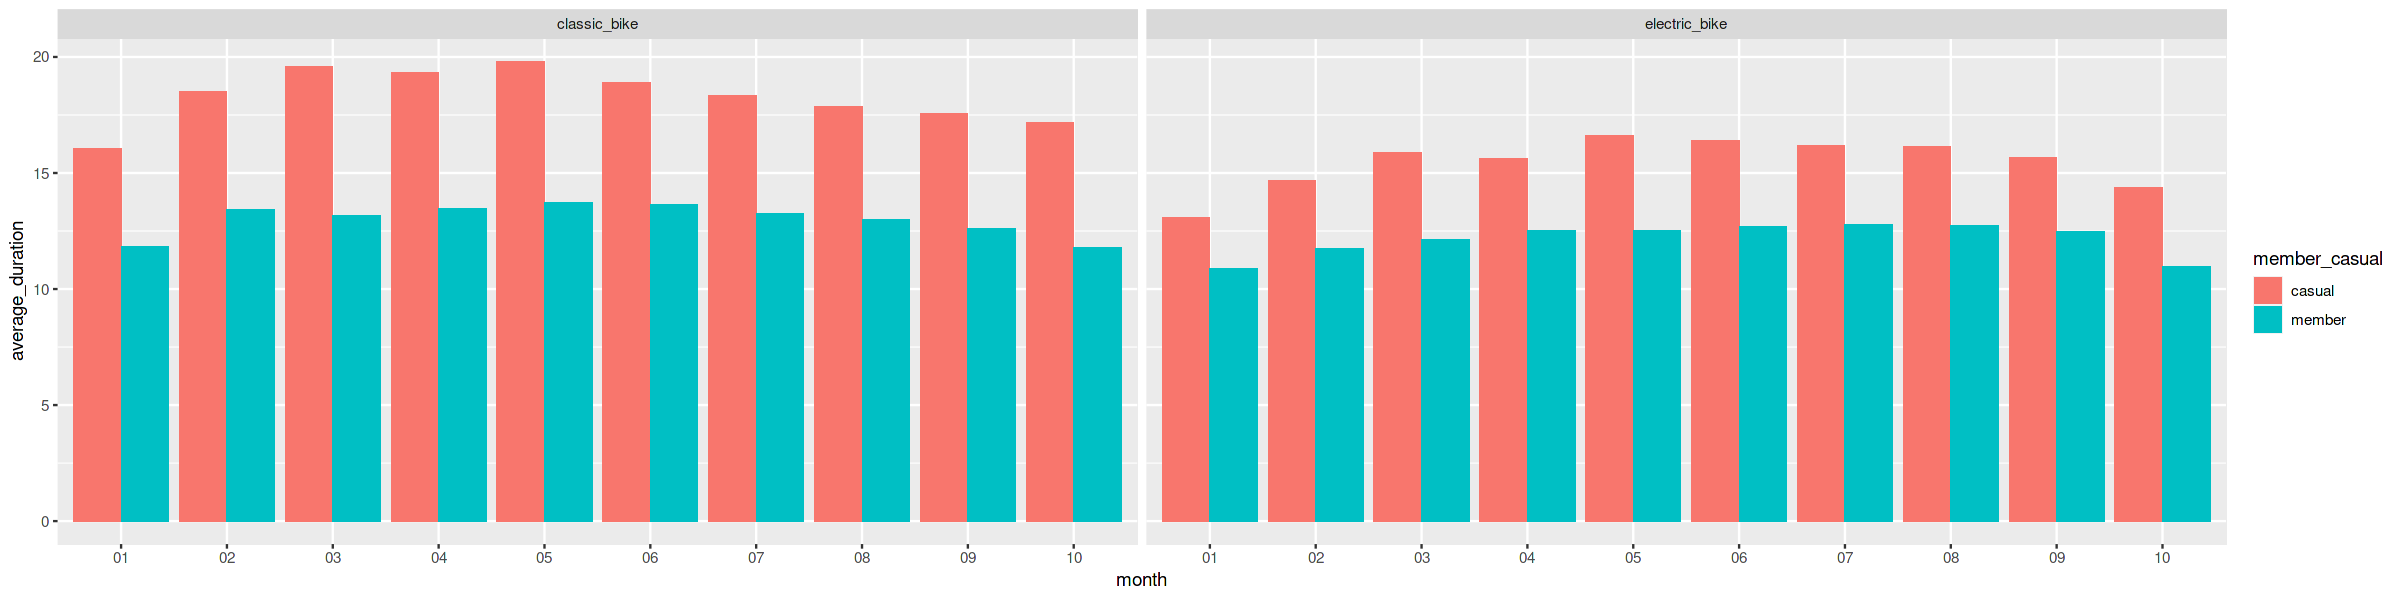

In [56]:
plot_cyclistic_2021_month %>%
ggplot(aes(x = month, y = average_duration, fill = member_casual))+
geom_col(position = "dodge")+
facet_wrap(~ rideable_type)
options(repr.plot.width = 20, repr.plot.height = 5)

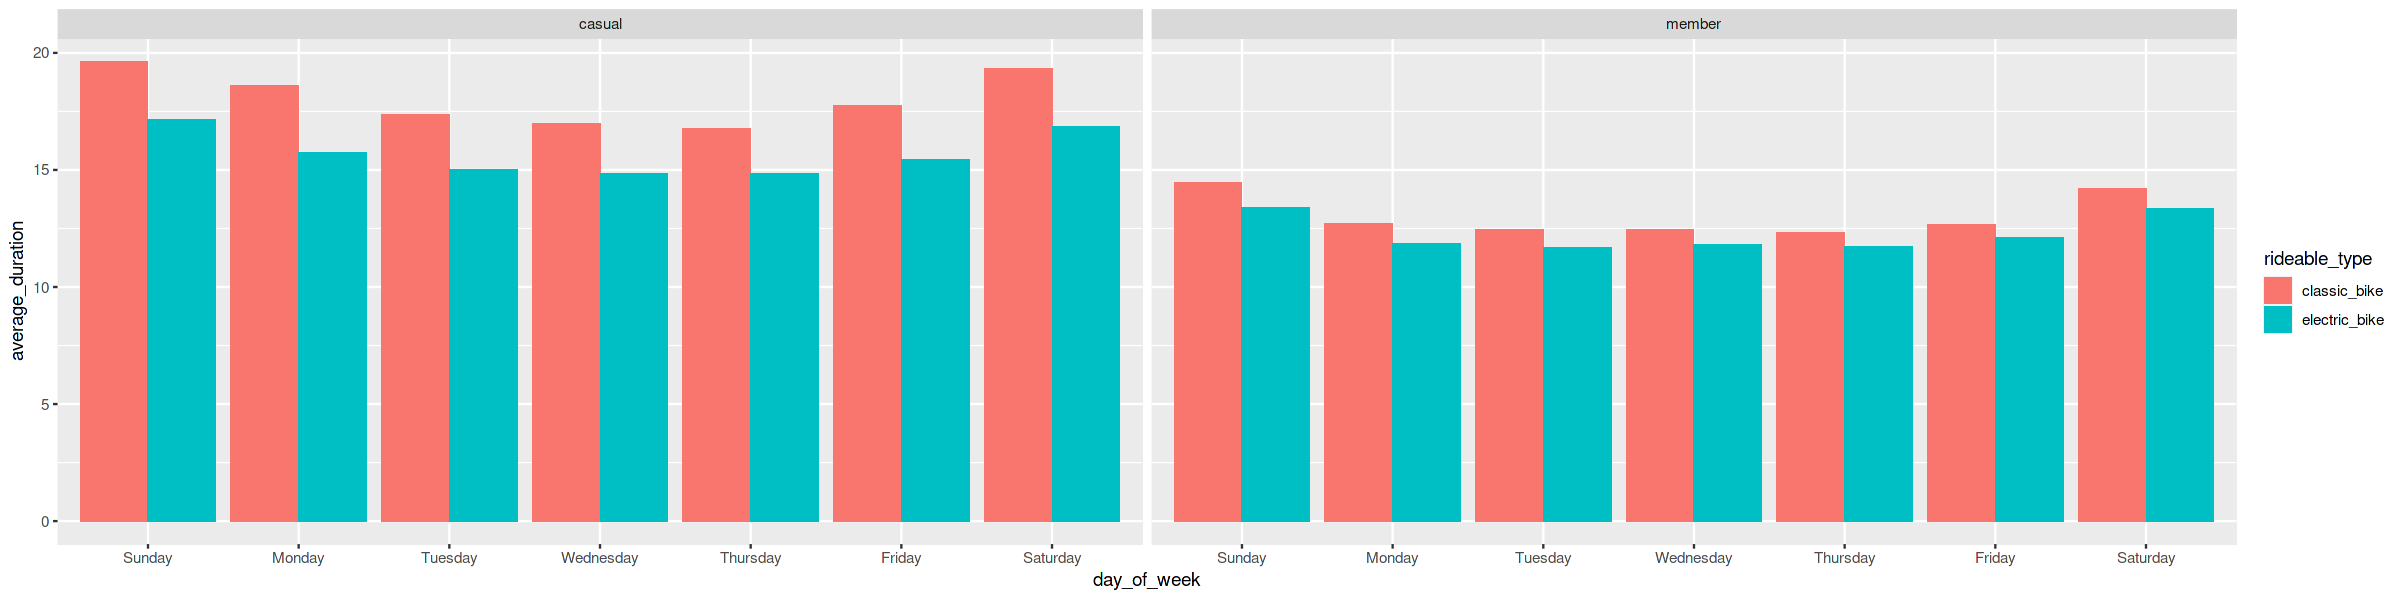

In [57]:
plot_cyclistic_2021_day_of_week %>%
ggplot(aes(x = day_of_week, y = average_duration, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

These plots for users that ride (less than 50 min) show a similar pattern both for single ride users and annual members. They use bicycles and e-bikes mostly to commute and this segment of casual riders needs to see the benefits of membership that can be articulated and delivered via push messages in Cyclistic App.

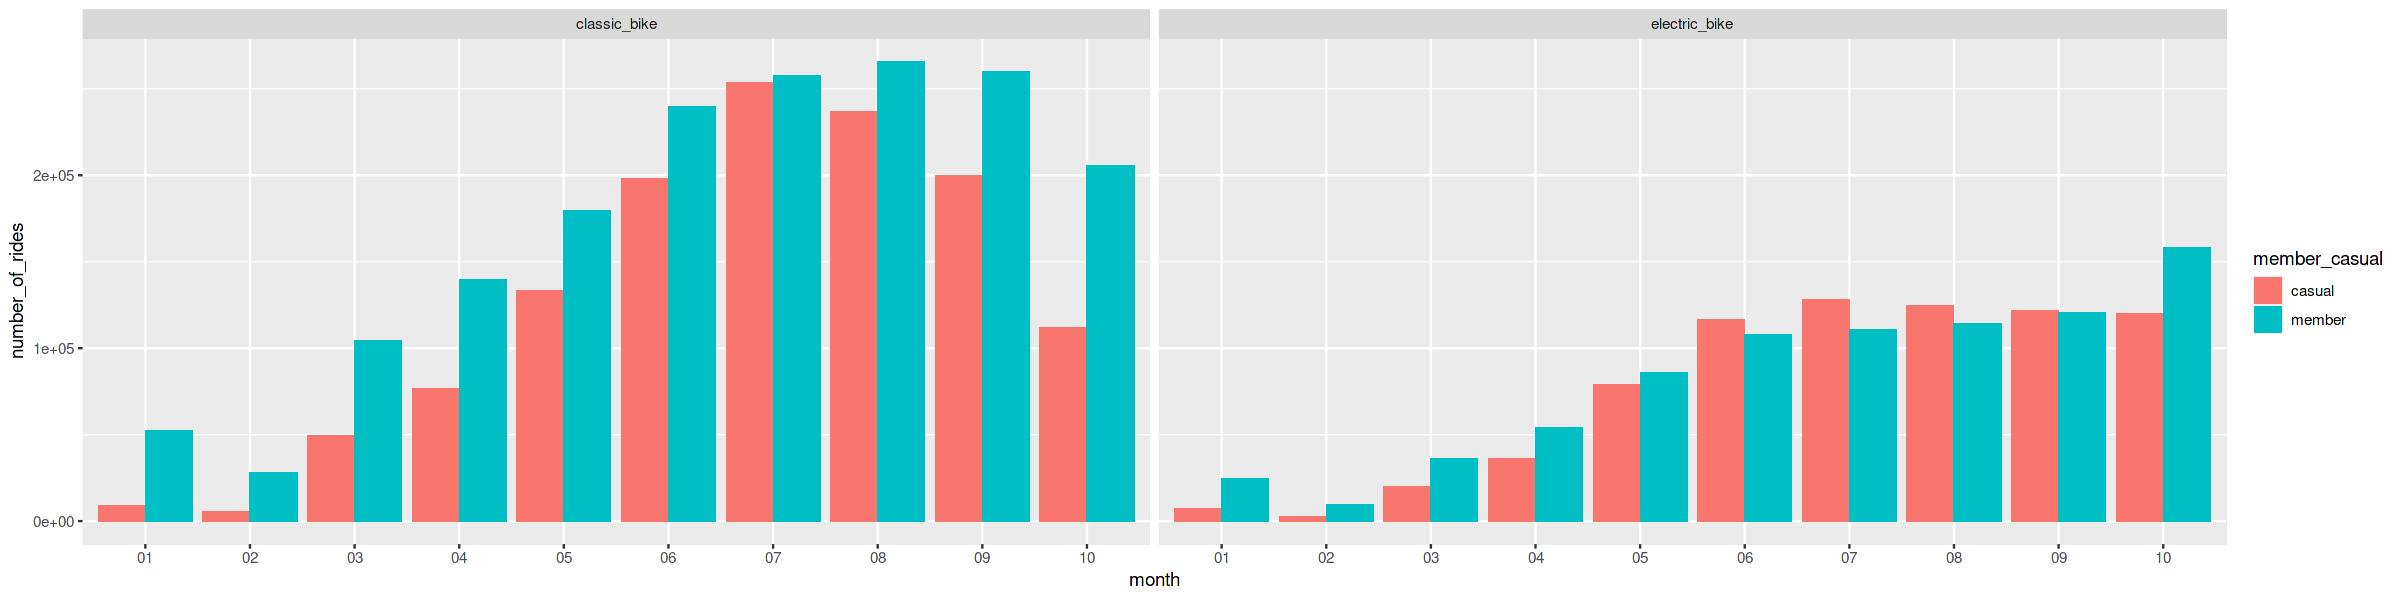

In [58]:
plot_cyclistic_2021_month %>%
ggplot(aes(x = month, y = number_of_rides, fill = member_casual))+
geom_col(position = "dodge")+
facet_wrap(~ rideable_type)
options(repr.plot.width = 20, repr.plot.height = 5)

Here we see a more precise picture showcasing that casual users and members, who ride for less than 50 min use e-bikes in the same way and will be more interested in using e-bikes for their daily needs in winter. So if Cyclistic offers an easy onboarding plan for these e-bike users without the unlock fee - that would be a no-brainer for them.

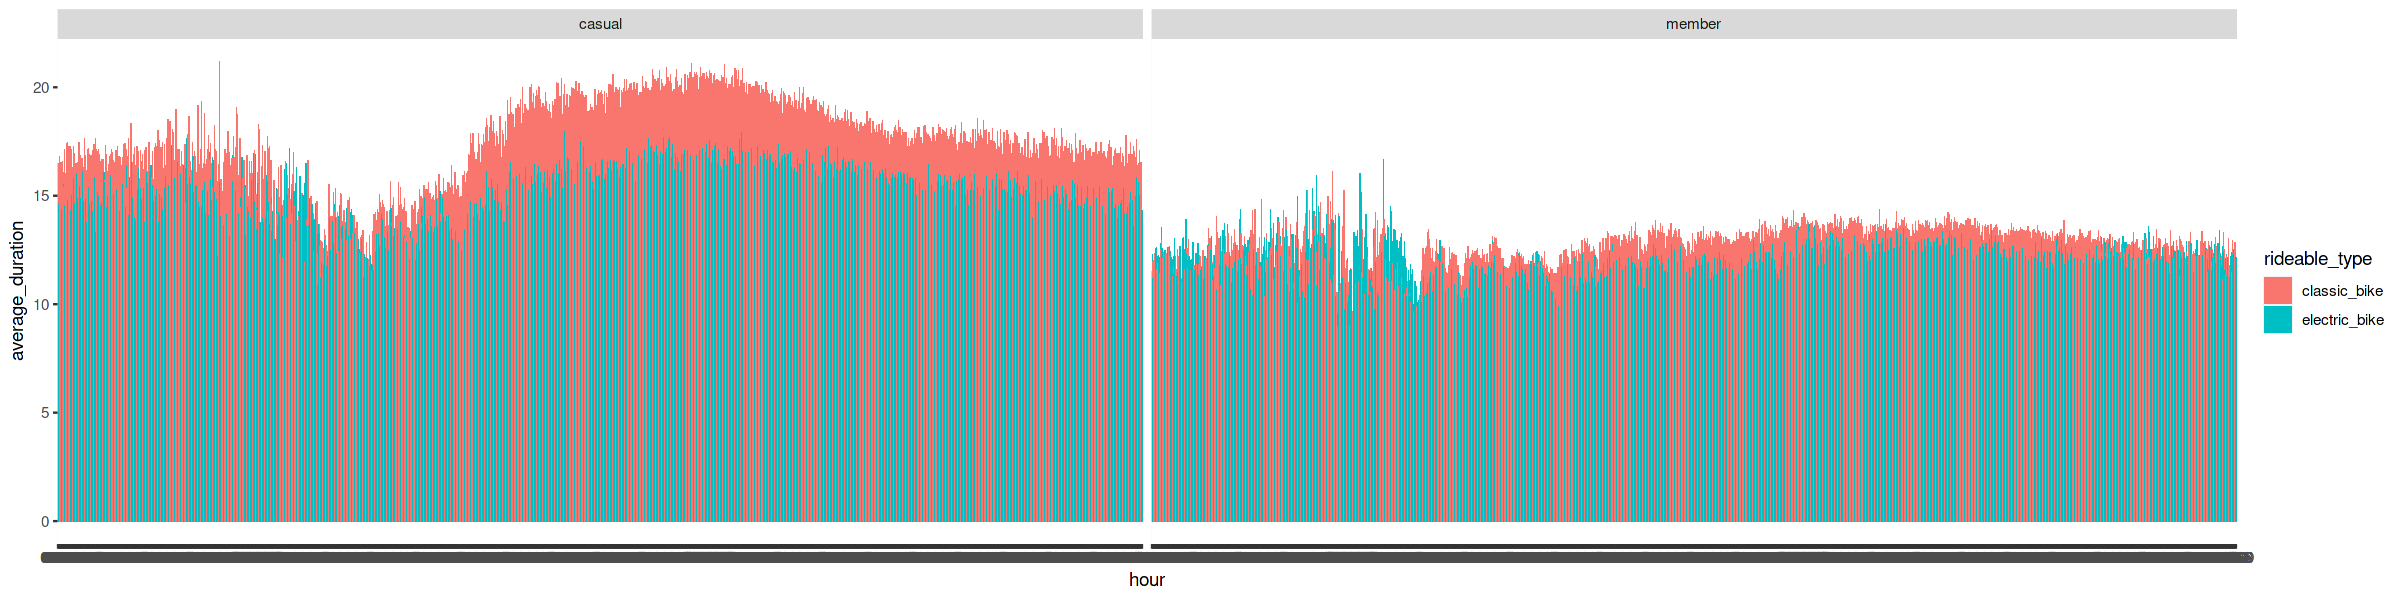

In [59]:
plot_cyclistic_2021_time %>%
ggplot(aes(x = hour, y = average_duration, fill = rideable_type))+
geom_col(position = "dodge")+
facet_wrap(~member_casual)
options(repr.plot.width = 20, repr.plot.height = 5)

Here we see that some casual riders and members use e-bikes at rush hour, so this segment of users can be turned into members easier, with a proper offer. 

<H2 id="conclusions">Conclusions</H2>


Two datasets with ~ 8 million trips were checked and cleaned. It took time to find missing station names that would be helpful in a geotargeting ad campaign for casual users. I won't put here the whole dataset for 2020 and 2021 combined. You can find visualizations for the years 20/21 in [tableau public](https://public.tableau.com/app/profile/alex.romanov/viz/Cyclistichistoricaltrends2020-2021byAlexRomanov/TOPAREASRUSHHOURS?publish=yes).

We had to check current pricing plans on the company's website to see what can be offered to casual riders to turn them into members. The patterns of bike use for different groups are shown on the plots, so we had to segment users for our analysis.

Starting with the Day Pass users. If they ride once a month on a day off or some tourists have a short trip to Chicago, they might not sign up for the whole year, but may do it **for a month**. It allows them to roam around the city easily if they decide to have one more trip during the month.

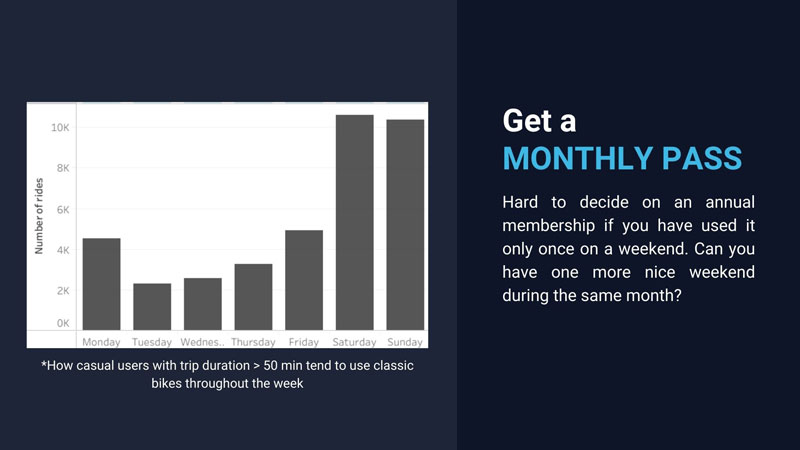

As for the way of promos delivery - Cyclistic App is the key. So the message about monthly subscriptions can be targeted, based on certain geo, to casual users, at the right time. So any promos that will help potential users to ride at least once and find out about the benefits of monthly passes **via the app** should be taken into consideration.

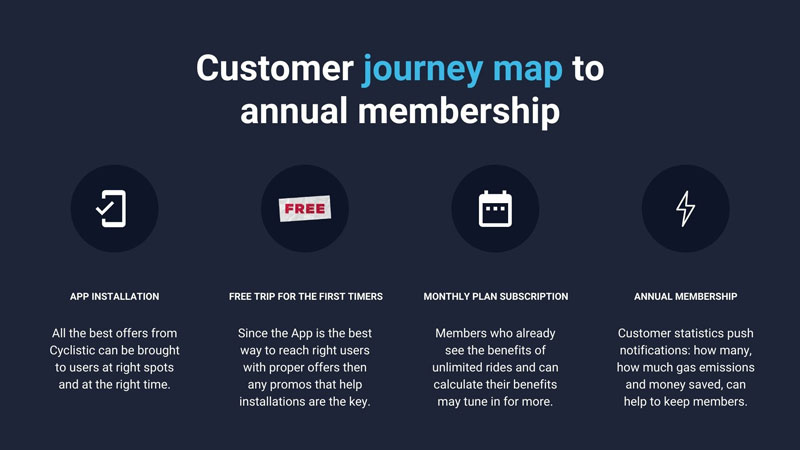

The e-bike rides statistics show a rising trend for both casual riders and members. Members tend to use e-bikes as long as classic ones, so I assume they are ok with the current pricing plan, even though they are billed 15 cents starting from the first minute of the trip. It means if the monthly plan will combine no unlock fee, but will charge the same 20 cents per minute might be a way for a lot of casual riders to getting a membership. That makes just 4 rides per month - a good deal. If they want to use it commuting to work it will be a lot more enticing to get monthly passes.

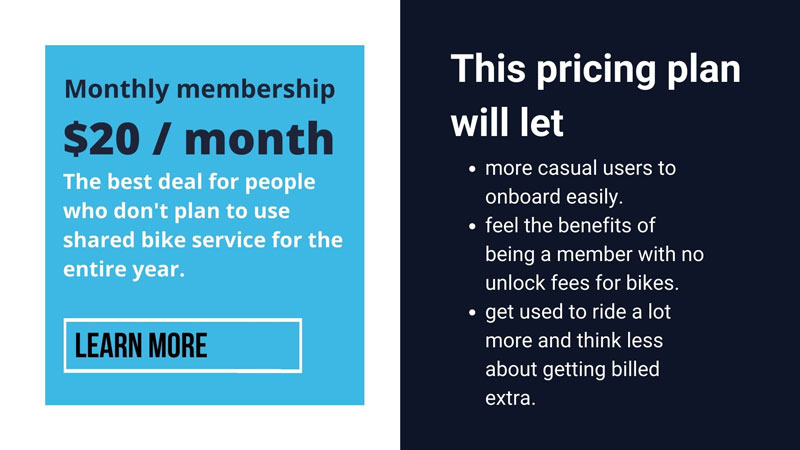

Thanks for your time reading my data analysis report for Cyclistic | Divvy. I'll post a link to my presentation based on this analysis in the comments.